In [1]:
pip install kaggle

In [2]:
mkdir ~/.kaggle

In [3]:
cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 601M/612M [00:04<00:00, 159MB/s]
100% 612M/612M [00:04<00:00, 148MB/s]


## Import modules

In [7]:
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.models import Sequential

import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
%matplotlib inline

## Import data

In [22]:
%cd /baru

/baru


In [23]:
!kaggle datasets download -d saadhaxxan/germantrafficsigns

 98% 116M/118M [00:01<00:00, 92.4MB/s]
100% 118M/118M [00:01<00:00, 106MB/s] 


In [24]:
!unzip germantrafficsigns.zip

Archive:  germantrafficsigns.zip
  inflating: signnames.csv           
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


In [25]:
train_file = 'train.p'
test_file = 'test.p'

with open(train_file, mode='rb') as f:
  train = pickle.load(f)


with open(test_file, mode='rb') as f:
  test = pickle.load(f)

print("Data Loaded")

Data Loaded


In [26]:
sign_name_df = pd.read_csv('signnames.csv')
sign_names = sign_name_df.SignName.values
sign_name_df.set_index("ClassId", inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [27]:
# Defining the features and labels for data train
X, y = train['features'], train['labels']

# Convert list into numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

# Define fetarues and labels for testing data
X_test, y_test = test['features'], test['labels']

# Converting lists into numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


In [28]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=21)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


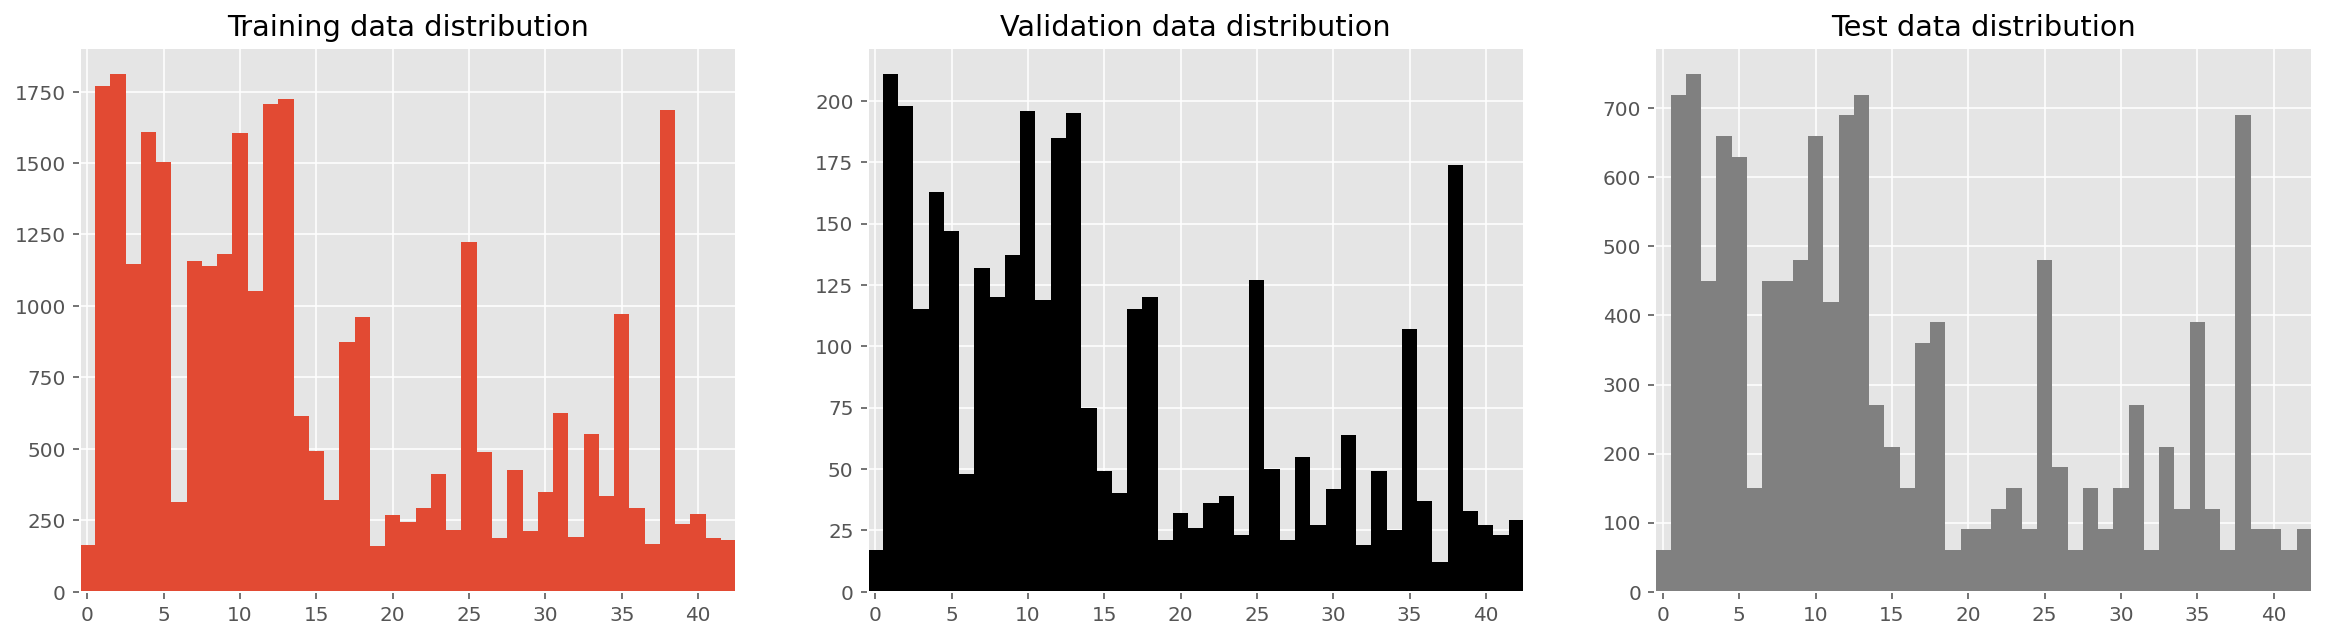

In [29]:
# Visualize the class distribution
n_labels = np.unique(y_train).size
def hist_data(y_data, title=None, ax=None, **kwargs):
  if not ax:
    fig = plt.figure()
    ax = fig.add_subplot(111)
  ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
  ax.set_xlim(-0.5, n_labels - 0.5)
  if 'label' in kwargs : ax.legend()
  if title : ax.set_title(title)

fig, ax = plt.subplots(1, 3, figsize=(20,5))
hist_data(y_train, title='Training data distribution', ax=ax[0])
hist_data(y_val, title='Validation data distribution', ax=ax[1], color='black')
hist_data(y_test, title='Test data distribution', ax=ax[2], color='grey')

In [30]:
# One hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAccuracy score is getting more than 96%, training stop...")
      self.model.stop_training = True

callbacks = myCallback()

In [33]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

In [34]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [35]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [44]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)         

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])
model.save('traffic_model.h5')

Epoch 1/25
979/979 [==============================] - 157s 160ms/step - loss: 1.6921 - accuracy: 0.5537 - val_loss: 0.4561 - val_accuracy: 0.8937
Epoch 2/25
979/979 [==============================] - 157s 161ms/step - loss: 0.5903 - accuracy: 0.8195 - val_loss: 0.1805 - val_accuracy: 0.9529
Epoch 3/25
979/979 [==============================] - 159s 162ms/step - loss: 0.4110 - accuracy: 0.8761 - val_loss: 0.0987 - val_accuracy: 0.9733
Epoch 4/25
979/979 [==============================] - 157s 161ms/step - loss: 0.3271 - accuracy: 0.9000 - val_loss: 0.1059 - val_accuracy: 0.9670
Epoch 5/25
979/979 [==============================] - 158s 162ms/step - loss: 0.2815 - accuracy: 0.9151 - val_loss: 0.1433 - val_accuracy: 0.9606
Epoch 6/25
979/979 [==============================] - 157s 160ms/step - loss: 0.2608 - accuracy: 0.9245 - val_loss: 0.0689 - val_accuracy: 0.9822
Epoch 7/25
979/979 [==============================] - 157s 160ms/step - loss: 0.2338 - accuracy: 0.9337 - val_loss: 0.0679 -

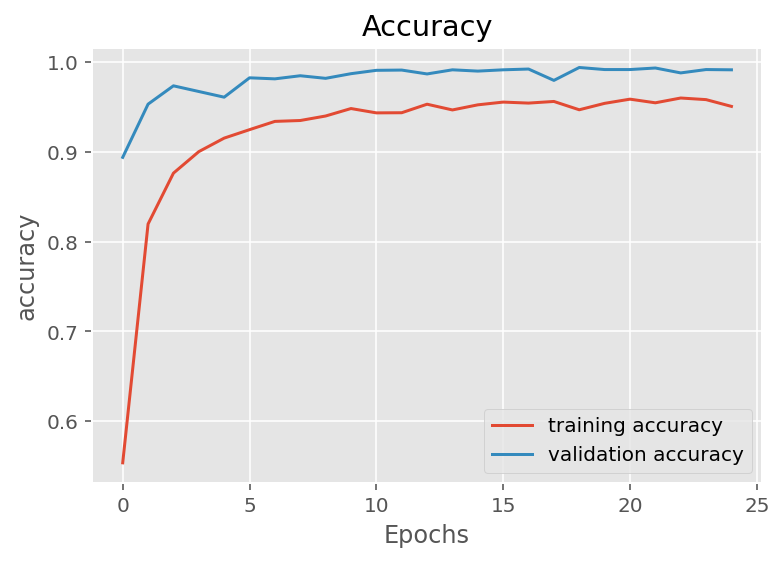

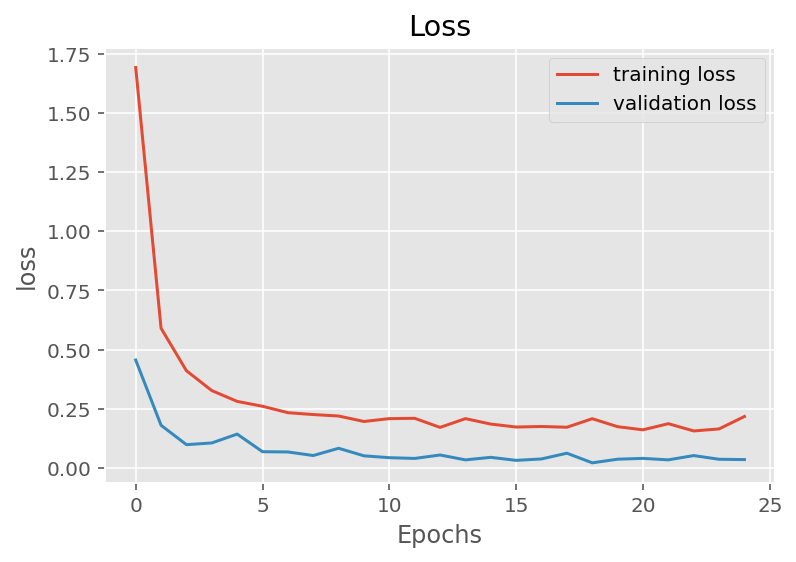

In [47]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

plt.figure(0)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## Testing

In [48]:
from sklearn.metrics import accuracy_score

pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

0.9573238321456848

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.91      0.98      0.95       720
           2       0.95      0.99      0.97       750
           3       0.94      0.97      0.96       450
           4       0.98      0.97      0.98       660
           5       0.95      0.94      0.95       630
           6       0.98      0.83      0.90       150
           7       0.97      0.96      0.96       450
           8       0.94      0.99      0.97       450
           9       0.97      1.00      0.98       480
          10       0.99      0.98      0.99       660
          11       0.96      0.91      0.93       420
          12       1.00      0.99      1.00       690
          13       0.99      0.99      0.99       720
          14       0.99      1.00      0.99       270
          15       0.99      0.96      0.98       210
          16       0.98      0.99      0.99       150
          17       0.99    